In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toml
from plotnine import (
    aes,
    element_blank,
    element_line,
    element_rect,
    element_text,
    facet_grid,
    facet_wrap,
    geom_bar,
    geom_boxplot,
    geom_col,
    geom_point,
    geom_text,
    geom_tile,
    geom_violin,
    ggplot,
    ggsave,
    ggtitle,
    labs,
    scale_color_manual,
    scale_fill_gradient,
    scale_fill_manual,
    scale_x_continuous,
    scale_x_discrete,
    scale_y_continuous,
    scale_y_discrete,
    theme,
    theme_bw,
    theme_classic,
    xlim,
    ylim,
)

In [2]:
# set paths and load data
path = pathlib.Path(
    "../../Data/clean/Plate2/nELISA_plate_430420_PBMC_cleanup4correlation.csv"
)
toml_path = pathlib.Path("../../../1.Exploratory_Data_Analysis/utils/params.toml")

df = pd.read_csv(path)
params = toml.load(toml_path)
list_of_treatments = params["list_of_treatments"]["treatments"]

In [3]:
df.head(3)

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Metadata_position_x,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,fourb_Metadata_Treatment_Dose_Inhibitor_Dose
0,0.097710,0.461685,0.270477,0.514695,0.479281,0.270494,0.708849,0.134432,0.350986,0.216932,...,0.560129,0.504521,0.490444,0.258834,0.238358,0.524276,0.250670,B06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
1,0.064513,0.451181,0.246274,0.471026,0.269795,0.204498,0.247611,0.322087,0.350642,0.349237,...,0.476656,0.315426,0.589522,0.381170,0.168645,0.455092,0.228752,C06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
2,0.061860,0.196318,0.236491,0.474891,0.174672,0.824721,0.704521,0.254823,0.443939,0.268677,...,0.389375,0.369421,0.680276,0.182956,0.263281,0.213596,0.064645,I06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025


In [4]:
# # get the columns with the treatment in treatment list
# df_treatment = df[
#     df["fourb_Metadata_Treatment_Dose_Inhibitor_Dose"].isin(list_of_treatments)
# ]

In [5]:
df.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Metadata_position_x,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,fourb_Metadata_Treatment_Dose_Inhibitor_Dose
0,0.097710,0.461685,0.270477,0.514695,0.479281,0.270494,0.708849,0.134432,0.350986,0.216932,...,0.560129,0.504521,0.490444,0.258834,0.238358,0.524276,0.250670,B06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
1,0.064513,0.451181,0.246274,0.471026,0.269795,0.204498,0.247611,0.322087,0.350642,0.349237,...,0.476656,0.315426,0.589522,0.381170,0.168645,0.455092,0.228752,C06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
2,0.061860,0.196318,0.236491,0.474891,0.174672,0.824721,0.704521,0.254823,0.443939,0.268677,...,0.389375,0.369421,0.680276,0.182956,0.263281,0.213596,0.064645,I06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
3,0.060998,0.596601,0.129926,0.302610,0.559309,0.087533,0.541110,0.350256,0.528260,0.313411,...,0.258029,0.561051,0.551671,0.582053,0.087565,0.140992,0.234191,J06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
4,0.061116,0.490832,0.339510,0.453362,0.414653,0.424223,0.702561,0.203464,0.502516,0.363301,...,0.615867,0.288153,0.506528,0.264141,0.296782,0.541689,0.167078,B07,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025


In [6]:
# inducer_dose_unit = inducer_dose_unit.drop_duplicates().reset_index(drop=True)

In [7]:
# df_treatment = df_treatment.merge(
#     inducer_dose_unit, on="oneb_Metadata_Treatment_Dose_Inhibitor_Dose"
# )

In [8]:
df.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Metadata_position_x,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,fourb_Metadata_Treatment_Dose_Inhibitor_Dose
0,0.097710,0.461685,0.270477,0.514695,0.479281,0.270494,0.708849,0.134432,0.350986,0.216932,...,0.560129,0.504521,0.490444,0.258834,0.238358,0.524276,0.250670,B06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
1,0.064513,0.451181,0.246274,0.471026,0.269795,0.204498,0.247611,0.322087,0.350642,0.349237,...,0.476656,0.315426,0.589522,0.381170,0.168645,0.455092,0.228752,C06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
2,0.061860,0.196318,0.236491,0.474891,0.174672,0.824721,0.704521,0.254823,0.443939,0.268677,...,0.389375,0.369421,0.680276,0.182956,0.263281,0.213596,0.064645,I06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
3,0.060998,0.596601,0.129926,0.302610,0.559309,0.087533,0.541110,0.350256,0.528260,0.313411,...,0.258029,0.561051,0.551671,0.582053,0.087565,0.140992,0.234191,J06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
4,0.061116,0.490832,0.339510,0.453362,0.414653,0.424223,0.702561,0.203464,0.502516,0.363301,...,0.615867,0.288153,0.506528,0.264141,0.296782,0.541689,0.167078,B07,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025


In [9]:
# # split oneb_Metadata_Treatment_Dose_Inhibitor_Dose column into 4 columns based on __

# df_treatment[["Treatment", "Dose", "Inhibitor", "Inhibitor_Dose"]] = df_treatment[
#     "oneb_Metadata_Treatment_Dose_Inhibitor_Dose"
# ].str.split("__", expand=True)
# df_treatment["Dose"] = df_treatment["Dose"] + df_treatment["inducer_dose_unit"]

In [10]:
# df_treatment["Treatment_Dose"] = (
#     df_treatment["Treatment"] + "_" + df_treatment["Dose"].astype(str)
# )
# df_treatment.drop(
#     [
#         "Treatment",
#         "Dose",
#         "Inhibitor",
#         "inducer_dose_unit",
#         "Inhibitor_Dose",
#         "oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
#     ],
#     axis=1,
#     inplace=True,
# )

In [11]:
df.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Metadata_position_x,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,fourb_Metadata_Treatment_Dose_Inhibitor_Dose
0,0.097710,0.461685,0.270477,0.514695,0.479281,0.270494,0.708849,0.134432,0.350986,0.216932,...,0.560129,0.504521,0.490444,0.258834,0.238358,0.524276,0.250670,B06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
1,0.064513,0.451181,0.246274,0.471026,0.269795,0.204498,0.247611,0.322087,0.350642,0.349237,...,0.476656,0.315426,0.589522,0.381170,0.168645,0.455092,0.228752,C06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
2,0.061860,0.196318,0.236491,0.474891,0.174672,0.824721,0.704521,0.254823,0.443939,0.268677,...,0.389375,0.369421,0.680276,0.182956,0.263281,0.213596,0.064645,I06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
3,0.060998,0.596601,0.129926,0.302610,0.559309,0.087533,0.541110,0.350256,0.528260,0.313411,...,0.258029,0.561051,0.551671,0.582053,0.087565,0.140992,0.234191,J06,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025
4,0.061116,0.490832,0.339510,0.453362,0.414653,0.424223,0.702561,0.203464,0.502516,0.363301,...,0.615867,0.288153,0.506528,0.264141,0.296782,0.541689,0.167078,B07,DMSO_0.100_DMSO_0.025,DMSO__0.100__DMSO__0.025


In [12]:
print(df.columns.to_list())

['Activin A [NSU]', 'AITRL (GITR Ligand) [NSU]', 'Amphiregulin [NSU]', 'Amyloid beta [NSU]', 'APRIL [NSU]', 'BAFF [NSU]', 'BCMA (TNFRSF17) [NSU]', 'BDNF [NSU]', 'BMP2 [NSU]', 'BMP3 [NSU]', 'BMP4 [NSU]', 'BMP6 [NSU]', 'BMP7 [NSU]', 'BMP9 [NSU]', 'C5_C5a [NSU]', 'Calbindin [NSU]', 'CCL1 [NSU]', 'CCL11 [NSU]', 'CCL13 [NSU]', 'CCL15 [NSU]', 'CCL16 [NSU]', 'CCL17 [NSU]', 'CCL18 [NSU]', 'CCL19 [NSU]', 'CCL2 [NSU]', 'CCL20 [NSU]', 'CCL21 [NSU]', 'CCL22 [NSU]', 'CCL23 [NSU]', 'CCL24 [NSU]', 'CCL25 [NSU]', 'CCL27 [NSU]', 'CCL28 [NSU]', 'CCL3 [NSU]', 'CCL4 [NSU]', 'CCL5 [NSU]', 'CCL7 [NSU]', 'CCL8 [NSU]', 'CD14 [NSU]', 'CD163 [NSU]', 'CD276 (B7-H3) [NSU]', 'CD27L [NSU]', 'CD30 [NSU]', 'CD40L [NSU]', 'CNTF [NSU]', 'CRP [NSU]', 'CX3CL1 [NSU]', 'CXCL1 [NSU]', 'CXCL10 [NSU]', 'CXCL11 [NSU]', 'CXCL12 (alpha) [NSU]', 'CXCL12 (beta) [NSU]', 'CXCL13 [NSU]', 'CXCL14 [NSU]', 'CXCL16 [NSU]', 'CXCL17 [NSU]', 'CXCL3 [NSU]', 'CXCL4 [NSU]', 'CXCL5 [NSU]', 'CXCL6 [NSU]', 'CXCL7 [NSU]', 'CXCL9 [NSU]', 'Cytochrom

In [13]:
# # sort df_treatment Treatment_Dose column custom order
# df_treatment = df_treatment.assign(
#     Treatment_Dose=df_treatment.Treatment_Dose.astype("category")
# )
# df_treatment["oneb_Metadata_Treatment_Dose_Inhibitor_Dose"] = df_treatment.Treatment_Dose.cat.set_categories(
#     [
#         "DMSO_0.100%",
#         "H2O2_100.000nM",
#         "H2O2_100.000µM",
#         "Thapsigargin_1.000µM",
#         "Thapsigargin_10.000µM",
#         "Flagellin_0.100µg/ml",
#         "Flagellin_1.000µg/ml",
#         "LPS_Nigericin_1.000_1.000µg/ml",
#         "LPS_Nigericin_1.000_10.000µg/ml",
#         "LPS_Nigericin_1.000_3.000µg/ml",
#         "LPS_0.010µg/ml",
#         "LPS_100.000µg/ml",
#     ],
# )

In [14]:
# output path for the treatment df
output_path = pathlib.Path(
    f"./results/PBMC_all_cytokine_values_per_treatment_per_well.csv"
)
df.to_csv(output_path, index=False)

/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 4 in image.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ./figures/TNF_alpha_IL-1_beta_scatter_plot.png


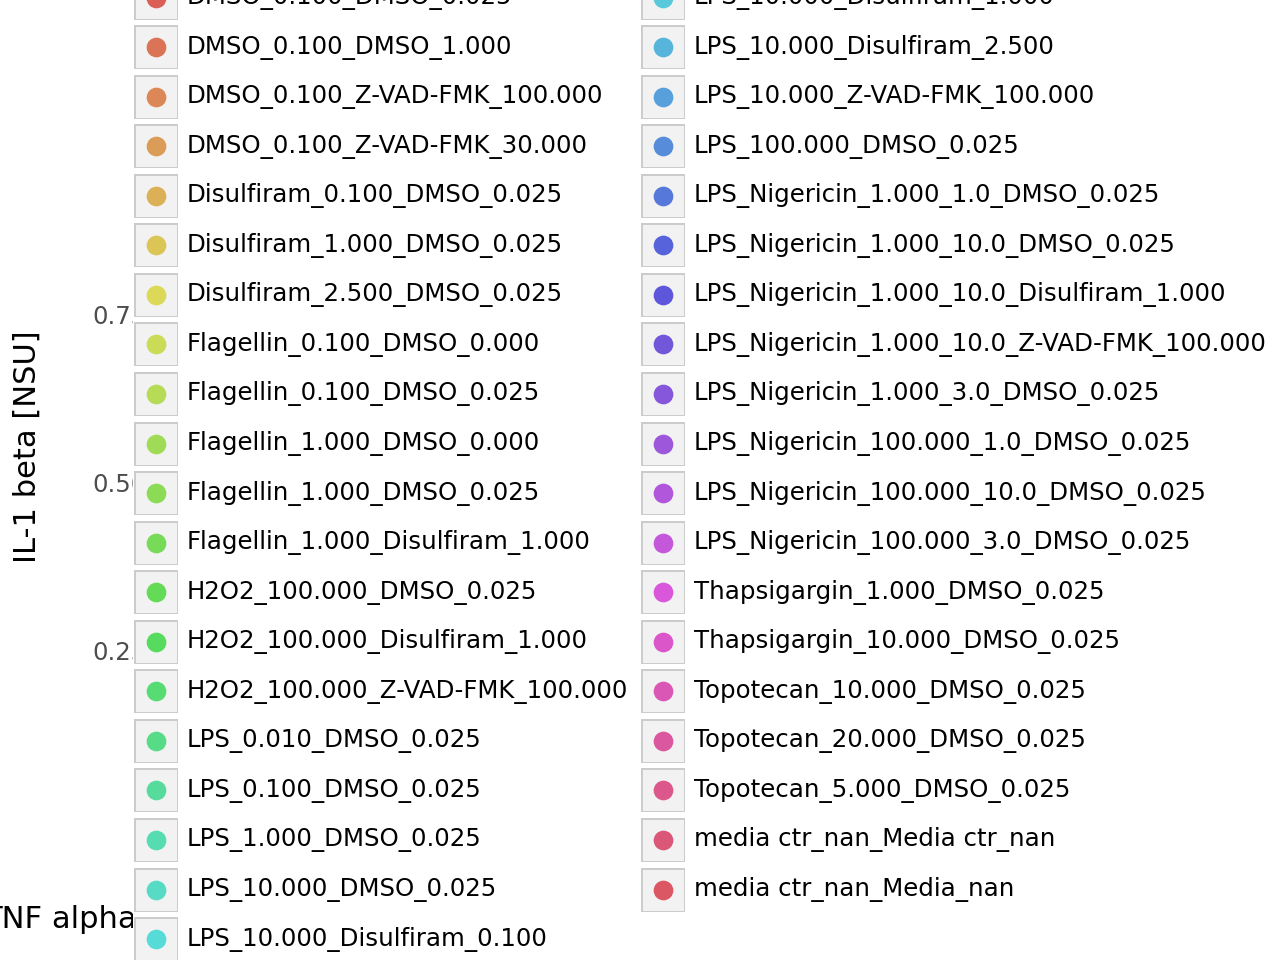

<Figure Size: (640 x 480)>

In [15]:
# plot scatter plot of all the treatment groups for IL-1 beta
# plot scatter plot of all the treatment groups for IL-6

p = (
    ggplot(
        df,
        aes(
            x="TNF alpha [NSU]",
            y="IL-1 beta [NSU]",
            color="oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
        ),
    )
    + geom_point(size=3)
    + theme_bw()
    + ylim(0, 1)
    + xlim(0, 1)
)

ggplot.save(
    p,
    filename="./figures/TNF_alpha_IL-1_beta_scatter_plot.png",
    width=6,
    height=4,
    units="in",
    dpi=300,
)
p

In [16]:
df_treatment = df.drop(
    columns=["Metadata_position_x", "fourb_Metadata_Treatment_Dose_Inhibitor_Dose"]
)
df_treatment = df_treatment.melt(
    id_vars=["oneb_Metadata_Treatment_Dose_Inhibitor_Dose"],
    value_vars=df_treatment.columns.to_list()[1:],
    var_name="Cytokine",
    value_name="Cytokine_Value",
)

In [17]:
# outpath for the melted df
output_path = pathlib.Path(
    f"./results/PBMC_all_cytokine_values_per_treatment_per_well_melted.csv"
)
df_treatment.to_csv(output_path, index=False)

In [18]:
# facet grid of treatment and dose with TNF alpha
p = (
    ggplot(
        df_treatment,
        aes(
            x="oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
            y="Cytokine_Value",
            fill="Cytokine",
        ),
    )
    + geom_bar(stat="identity", position="dodge")
    + facet_grid(". ~ Cytokine")
    + theme_bw()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)

p = p + theme(figure_size=(16, 8))

# ggplot.save(p, filename="PBMC_Treatment_Dose_TNF_alpha.png", path="figures/")